# Dogrusal olmayan Regresyon Modelleri

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import neighbors
from sklearn.svm import SVR

In [3]:
from warnings import filterwarnings
filterwarnings('ignore')

# KNN

In [10]:
df = pd.read_csv("Hitters.csv")
df = df.dropna()
dms = pd.get_dummies(df[['League','Division',"NewLeague"]])
y = df["Salary"]
X_ = df.drop(['Salary','League','Division','NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N','Division_W','NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=42)

In [11]:
X_train.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
183,328.0,91.0,12.0,51.0,43.0,33.0,2.0,342.0,94.0,12.0,51.0,44.0,33.0,145.0,59.0,8.0,1,0,1
229,514.0,144.0,0.0,67.0,54.0,79.0,9.0,4739.0,1169.0,13.0,583.0,374.0,528.0,229.0,453.0,15.0,1,0,1
286,593.0,152.0,23.0,69.0,75.0,53.0,6.0,2765.0,686.0,133.0,369.0,384.0,321.0,315.0,10.0,6.0,0,1,0
102,233.0,49.0,2.0,41.0,23.0,18.0,8.0,1350.0,336.0,7.0,166.0,122.0,106.0,102.0,132.0,10.0,0,0,0
153,341.0,95.0,6.0,48.0,42.0,20.0,10.0,2964.0,808.0,81.0,379.0,428.0,221.0,158.0,4.0,5.0,1,1,1


### Model & Tahmin

In [12]:
knn_model = KNeighborsRegressor().fit(X_train, y_train)
knn_model

KNeighborsRegressor()

In [13]:
knn_model.n_neighbors

5

In [14]:
knn_model.metric

'minkowski'

In [15]:
dir(knn_model)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_algorithm_metric',
 '_check_n_features',
 '_estimator_type',
 '_fit',
 '_fit_X',
 '_fit_method',
 '_get_param_names',
 '_get_tags',
 '_kneighbors_reduce_func',
 '_more_tags',
 '_pairwise',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_tree',
 '_validate_data',
 '_y',
 'algorithm',
 'effective_metric_',
 'effective_metric_params_',
 'fit',
 'get_params',
 'kneighbors',
 'kneighbors_graph',
 'leaf_size',
 'metric',
 'metric_params',
 'n_features_in_',
 'n_jobs',
 'n_neighbors',
 'n_samples_fit_',
 'p',
 'predict',
 'radius',
 'sc

In [16]:
knn_model.predict(X_test)[0:5]

array([ 510.3334,  808.3334,  772.5   ,  125.5   , 1005.    ])

In [17]:
y_pred = knn_model.predict(X_test)

In [18]:
np.sqrt(mean_squared_error(y_test, y_pred)) #knn ile ogrendigimiz ilkel test hatamiz

426.6570764525201

## Model Tuning

In [19]:
range(10)

range(0, 10)

In [20]:
RMSE = []
for k in range(10):
    k = k+1
    knn_model = KNeighborsRegressor(n_neighbors=k).fit(X_train, y_train)
    y_pred=knn_model.predict(X_test)
    rmse=np.sqrt(mean_squared_error(y_test,y_pred))
    RMSE.append(rmse)
    print("k=", k, "icin RMSE degeri:", rmse)

k= 1 icin RMSE degeri: 455.03925390751965
k= 2 icin RMSE degeri: 415.99629571490965
k= 3 icin RMSE degeri: 420.6765370082348
k= 4 icin RMSE degeri: 428.8564674588792
k= 5 icin RMSE degeri: 426.6570764525201
k= 6 icin RMSE degeri: 423.5071669008732
k= 7 icin RMSE degeri: 414.9361222421057
k= 8 icin RMSE degeri: 413.7094731463598
k= 9 icin RMSE degeri: 417.84419990871265
k= 10 icin RMSE degeri: 421.6252180741266


In [21]:
#GridSearchCV -olasi tum parametre kombinasyonlarini degerlendirmek ve belirlemek icin kullanilan bir fonksiyondur.

In [22]:
knn_params = {"n_neighbors":np.arange(1,30,1)}

In [23]:
knn = KNeighborsRegressor()

In [25]:
knn_cv_model=GridSearchCV(knn,knn_params,cv=10).fit(X_train, y_train)

In [26]:
knn_cv_model.best_params_

{'n_neighbors': 8}

In [27]:
#final model
knn_tuned = KNeighborsRegressor(n_neighbors=knn_cv_model.best_params_["n_neighbors"]).fit(X_train,y_train)

In [29]:
y_pred = knn_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

413.7094731463598

# Destek Vektor Regresyonu(Support Vector Regression)

In [3]:
df = pd.read_csv("Hitters.csv")
df = df.dropna()
dms = pd.get_dummies(df[['League','Division',"NewLeague"]])
y = df["Salary"]
X_ = df.drop(['Salary','League','Division','NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N','Division_W','NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=42)

### Model&Tahmin

In [4]:
svr_model = SVR("linear").fit(X_train,y_train) #linear yerine rbf'de yapabiliriz. Kerneli degistirmis oluruz.

In [5]:
svr_model

SVR(kernel='linear')

In [7]:
svr_model.predict(X_train)[0:5]

array([219.32622627, 702.43039317, 623.20559641, 153.77538484,
       463.15191157])

In [8]:
svr_model.predict(X_test)[0:5]

array([679.14754919, 633.72883529, 925.68639938, 270.28464317,
       530.26659421])

In [9]:
svr_model.intercept_ #knn de boyle bir katsayi gelme durumu yok. Burada var.

array([-80.15196063])

In [10]:
svr_model.coef_

array([[ -1.2183904 ,   6.09602978,  -3.67574533,   0.14217072,
          0.51435925,   1.28388992,  12.55922527,  -0.08693754,
          0.46597185,   2.98259931,   0.52944513,  -0.79820793,
         -0.16015531,   0.30872795,   0.28842348,  -1.79560066,
          6.41868986, -10.74313785,   1.33374319]])

In [11]:
#test
y_pred = svr_model.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

370.0408415795005

### Model Tuning

In [12]:
svr_params= {"C": [0.1,0.5,1,3]}

In [13]:
svr_cv_model = GridSearchCV(svr_model, svr_params, cv = 5).fit(X_train,y_train)

In [14]:
svr_cv_model.best_params_

{'C': 0.5}

In [15]:
svr_cv_model = GridSearchCV(svr_model, svr_params, cv = 5, verbose=2, n_jobs=-1).fit(X_train,y_train) #verbose calisma esnasinda durumu raporlayarak calisma gerceklestirir. njobs -1 ile calistirilirsa islemci maksimum performans ile calisir.

Fitting 5 folds for each of 4 candidates, totalling 20 fits


In [16]:
svr_cv_model.best_params_

{'C': 0.5}

In [17]:
svr_tuned = SVR("linear", C=0.5).fit(X_train,y_train)

In [18]:
y_pred = svr_tuned.predict(X_test)

In [19]:
np.sqrt(mean_squared_error(y_test, y_pred))

367.98747616655294

# Yapay Sinir Aglari

In [4]:
df = pd.read_csv("Hitters.csv")
df = df.dropna()
dms = pd.get_dummies(df[['League','Division',"NewLeague"]])
y = df["Salary"]
X_ = df.drop(['Salary','League','Division','NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N','Division_W','NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=42)

### Model&Tahmin

In [5]:
#yapay sinir aglari homojen veri setleri uzerinde daha iyi calisan bir algoritmadir.
#yapay sinir aglarini standartlastirma islemi sonrasinda kullanmak daha sagliklidir.

In [6]:
scaler = StandardScaler()

In [10]:
scaler.fit(X_train) #train setimizi standartlastirma islemine tabi tuttuk.
X_train_scaled = scaler.transform(X_train)


In [11]:
X_test_scaled = scaler.transform(X_test) #burada train'de oldugu gibi fit'de edebiliriz, problem olmaz.

In [13]:
mlp_model = MLPRegressor().fit(X_train_scaled, y_train)

In [14]:
mlp_model #activation relu olarak secilmis oluyor.

MLPRegressor()

In [15]:
mlp_model.predict(X_test_scaled)[0:5] #tahmin etme gerceklestirildi.

array([20.89130155, 38.89605444, 68.86822833, 13.55828475, 22.03268609])

In [16]:
y_pred = mlp_model.predict(X_test_scaled)
np.sqrt(mean_squared_error(y_test,y_pred)) #ilkel test hatamizi hesapladik.

659.67442319447

### Model Tuning

In [17]:
mlp_params = {"alpha": [0.1,0.01,0.02,0.001,0.0001], #lambdalar, ceza parametrelerimiz.
             "hidden_layer_sizes": [(10,20),(5,5),(100,100)]} 
#once 0.1'i alip 10,20 ve diger hidden layerlarini deneyecek, ardindan diger alphalar ile diger diger boyle ilerleyecek.

In [34]:
mlp_cv_model = GridSearchCV(mlp_model, mlp_params, cv=5, verbose=2).fit(X_train_scaled, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV] END .............alpha=0.1, hidden_layer_sizes=(10, 20); total time=   0.0s
[CV] END .............alpha=0.1, hidden_layer_sizes=(10, 20); total time=   0.0s
[CV] END .............alpha=0.1, hidden_layer_sizes=(10, 20); total time=   0.0s
[CV] END .............alpha=0.1, hidden_layer_sizes=(10, 20); total time=   0.0s
[CV] END .............alpha=0.1, hidden_layer_sizes=(10, 20); total time=   0.0s
[CV] END ...............alpha=0.1, hidden_layer_sizes=(5, 5); total time=   0.0s
[CV] END ...............alpha=0.1, hidden_layer_sizes=(5, 5); total time=   0.0s
[CV] END ...............alpha=0.1, hidden_layer_sizes=(5, 5); total time=   0.0s
[CV] END ...............alpha=0.1, hidden_layer_sizes=(5, 5); total time=   0.0s
[CV] END ...............alpha=0.1, hidden_layer_sizes=(5, 5); total time=   0.0s
[CV] END ...........alpha=0.1, hidden_layer_sizes=(100, 100); total time=   0.1s
[CV] END ...........alpha=0.1, hidden_layer_size

In [35]:
mlp_cv_model.best_params_

{'alpha': 0.001, 'hidden_layer_sizes': (100, 100)}

In [42]:
#final
mlp_tuned = MLPRegressor(alpha = 0.001, hidden_layer_sizes = (100,100)).fit(X_train_scaled,y_train)

In [43]:
y_pred = mlp_tuned.predict(X_test_scaled)

In [44]:
np.sqrt(mean_squared_error(y_test, y_pred))

358.7420333228838

# CART (Classification and Regression Tree)

In [45]:
df = pd.read_csv("Hitters.csv")
df = df.dropna()
dms = pd.get_dummies(df[['League','Division',"NewLeague"]])
y = df["Salary"]
X_ = df.drop(['Salary','League','Division','NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N','Division_W','NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=42)

In [46]:
X_train = pd.DataFrame(X_train["Hits"])
X_test = pd.DataFrame(X_test["Hits"])

In [ ]:
#model ve tahmin

In [54]:
cart_model = DecisionTreeRegressor(max_leaf_nodes = 10)

In [55]:
cart_model.fit(X_train, y_train)

DecisionTreeRegressor(max_leaf_nodes=10)

Text(0, 0.5, 'Maas(Salary)')

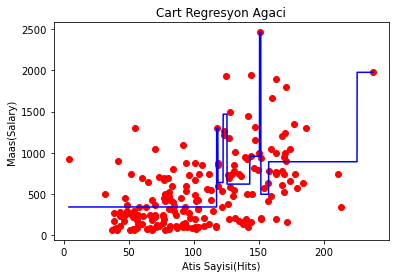

In [56]:
#kural noktalarini gosterebilmek icin bir izgara(grid) islemi yapildi. min ve max goz onunde bulundurulacak.
X_grid = np.arange(min(np.array(X_train)), max(np.array(X_train)), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))

#bir sacilim grafigi olusturuldu.
plt.scatter(X_train, y_train, color='red')
#bu gridin ustune modele iliskin bilgilerin gorsellestirilmesi yapildi.
plt.plot(X_grid, cart_model.predict(X_grid), color='blue')

plt.title('Cart Regresyon Agaci')
plt.xlabel('Atis Sayisi(Hits)')
plt.ylabel('Maas(Salary)')

In [57]:
#tek degiskenli tahmin

In [58]:
cart_model.predict(X_test)[0:5]

array([621.96792308, 958.61111111, 621.96792308, 345.20115517,
       345.20115517])

In [59]:
y_pred = cart_model.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

486.34593105235456

In [60]:
#tum degiskenler

In [61]:
df = pd.read_csv("Hitters.csv")
df = df.dropna()
dms = pd.get_dummies(df[['League','Division',"NewLeague"]])
y = df["Salary"]
X_ = df.drop(['Salary','League','Division','NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N','Division_W','NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=42)

In [62]:
cart_model = DecisionTreeRegressor().fit(X_train,y_train)

In [63]:
y_pred = cart_model.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

490.59906977426976

# Model Tuning

In [64]:
cart_model
#CART algoritmasi, genellenebilirlik kaygisi olmayan, mevcut durumu ifade etmek icin makine ogrenme algoritmasi kullanmamiz gereken senaryolarda
# en basarili algoritmalardan biridir. Hedef degiskene gore diger bagimsiz degiskenlerin barindirdigi bilgilerin nasil homojenlestirilmesi gerektigini en iyi ortaya koyan algoritmalardan birisidir.

DecisionTreeRegressor()

In [69]:
cart_model = DecisionTreeRegressor(max_depth=5).fit(X_train,y_train)
y_pred = cart_model.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

463.45681552900174

In [70]:
?cart_model

Type:        DecisionTreeRegressor
String form: DecisionTreeRegressor(max_depth=5)
File:        c:\users\burak\anaconda3\lib\site-packages\sklearn\tree\_classes.py
Docstring:  
A decision tree regressor.

Read more in the :ref:`User Guide <tree>`.

Parameters
----------
criterion : {"mse", "friedman_mse", "mae", "poisson"}, default="mse"
    The function to measure the quality of a split. Supported criteria
    are "mse" for the mean squared error, which is equal to variance
    reduction as feature selection criterion and minimizes the L2 loss
    using the mean of each terminal node, "friedman_mse", which uses mean
    squared error with Friedman's improvement score for potential splits,
    "mae" for the mean absolute error, which minimizes the L1 loss using
    the median of each terminal node, and "poisson" which uses reduction in
    Poisson deviance to find splits.

    .. versionadded:: 0.18
       Mean Absolute Error (MAE) criterion.

    .. versionadded:: 0.24
        Poisson

In [71]:
cart_params = {"max_depth": [2,3,4,5,10,20],
              "min_samples_split": [2,10,5,30,50,100]}

In [72]:
cart_model = DecisionTreeRegressor()

In [73]:
cart_cv_model = GridSearchCV(cart_model, cart_params, cv=10).fit(X_train, y_train)

In [74]:
cart_cv_model.best_params_

{'max_depth': 5, 'min_samples_split': 50}

In [75]:
#final model

In [79]:
cart_tuned_model = DecisionTreeRegressor(max_depth = 10, min_samples_split=50).fit(X_train,y_train)

In [80]:
y_pred = cart_tuned_model.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))
#ilkel hata olan 490'dan 361'e kadar inmis oldu.

361.0876906511434

# Random Forests

In [4]:
df = pd.read_csv("Hitters.csv")
df = df.dropna()
dms = pd.get_dummies(df[['League','Division',"NewLeague"]])
y = df["Salary"]
X_ = df.drop(['Salary','League','Division','NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N','Division_W','NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=42)

### Model&Tahmin

In [5]:
rf_model = RandomForestRegressor(random_state = 42 ).fit(X_train, y_train)

In [6]:
rf_model

RandomForestRegressor(random_state=42)

In [7]:
y_pred = rf_model.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred)) #344 bizim ilkel hatamiz.

344.8191624908484

### Model Tuning

In [10]:
rf_params = {"max_depth": [5,8,10],
            "max_features": [2,5,10],
            "n_estimators": [200,500,1000,2000],#agaclar. makalelerde en iyi 500 ve 2000 deniyor.
            "min_samples_split": [2,10,80,100]} 

In [11]:
rf_cv_model = GridSearchCV(rf_model, rf_params, cv = 10, verbose = 2).fit(X_train, y_train)

Fitting 10 folds for each of 144 candidates, totalling 1440 fits
[CV] END max_depth=5, max_features=2, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END max_depth=5, max_features=2, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END max_depth=5, max_features=2, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=5, max_features=2, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END max_depth=5, max_features=2, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END max_depth=5, max_features=2, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END max_depth=5, max_features=2, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END max_depth=5, max_features=2, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END max_depth=5, max_features=2, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END max_depth=5, max_features=2, min_samples_split=2, n_estimators

In [12]:
rf_cv_model.best_params_

{'max_depth': 8,
 'max_features': 2,
 'min_samples_split': 2,
 'n_estimators': 200}

In [13]:
rf_model = RandomForestRegressor(random_state=42, max_depth=8,
                                max_features=2,
                                min_samples_split=2,
                                n_estimators=200)
rf_tuned = rf_model.fit(X_train, y_train)

In [14]:
rf_tuned

RandomForestRegressor(max_depth=8, max_features=2, n_estimators=200,
                      random_state=42)

In [15]:
y_pred = rf_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

349.1649379391149

### degisken onem duzeyi

In [16]:
rf_tuned.feature_importances_*100

array([5.81548333, 6.38504706, 3.52630602, 4.18186433, 4.68121896,
       4.92291235, 7.38388416, 9.72940722, 8.68736867, 7.89130478,
       8.78157948, 8.30862336, 9.69431474, 4.71131944, 2.04114365,
       1.83878075, 0.38469815, 0.55485771, 0.47988582])

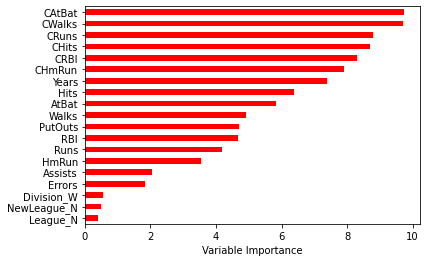

In [17]:
Importance = pd.DataFrame({'Importance': rf_tuned.feature_importances_*100},
                         index=X_train.columns)

Importance.sort_values(by = 'Importance',
                      axis=0,
                      ascending=True).plot(kind = 'barh',
                                          color='r')

plt.xlabel('Variable Importance')
plt.gca().legend_=None